# Smooth manifolds, vector fields and tensor fields

This notebook accompanies the lecture
[Symbolic tensor calculus on manifolds](http://sagemanifolds.obspm.fr/jncf2018/) at JNCF 2018.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/JNCF2018/jncf18_vector.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

In [1]:
%display latex

Let us restore the 2-sphere manifold constructed in the [preceeding worksheet](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_scalar.ipynb):

In [2]:
M = Manifold(2, 'M')
U = M.open_subset('U')
XU.<x,y> = U.chart()
V = M.open_subset('V')
XV.<xp,yp> = V.chart("xp:x' yp:y'")
M.declare_union(U,V)
XU_to_XV = XU.transition_map(XV, 
                             (x/(x^2+y^2), y/(x^2+y^2)), 
                             intersection_name='W',
                             restrictions1= x^2+y^2!=0, 
                             restrictions2= xp^2+yp^2!=0)
XV_to_XU = XU_to_XV.inverse()
M.atlas()

[Chart (U, (x, y)),
 Chart (V, (xp, yp)),
 Chart (W, (x, y)),
 Chart (W, (xp, yp))]

We also reconstruct the point $p$:

In [3]:
p = U((1,2), chart=XU, name='p')
print(p)

Point p on the 2-dimensional differentiable manifold M


and the embedding $\mathbb{S}^2 \to \mathbb{R}^3$:

In [4]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3')
XR3.<X,Y,Z> = R3.chart()
Phi = M.diff_map(R3, {(XU, XR3): 
                       [2*x/(1+x^2+y^2), 2*y/(1+x^2+y^2),
                        (x^2+y^2-1)/(1+x^2+y^2)],
                      (XV, XR3): 
                       [2*xp/(1+xp^2+yp^2), 2*yp/(1+xp^2+yp^2),
                        (1-xp^2-yp^2)/(1+xp^2+yp^2)]},
                  name='Phi', latex_name=r'\Phi')
Phi.display()

Phi: M --> R^3
on U: (x, y) |--> (X, Y, Z) = (2*x/(x^2 + y^2 + 1), 2*y/(x^2 + y^2 + 1), (x^2 + y^2 - 1)/(x^2 + y^2 + 1))
on V: (xp, yp) |--> (X, Y, Z) = (2*xp/(xp^2 + yp^2 + 1), 2*yp/(xp^2 + yp^2 + 1), -(xp^2 + yp^2 - 1)/(xp^2 + yp^2 + 1))

In [5]:
graph = XU.plot(chart=XR3, mapping=Phi, number_values=25, 
                label_axes=False) + \
        XV.plot(chart=XR3, mapping=Phi, number_values=25, 
                color='green', label_axes=False) + \
        p.plot(chart=XR3, mapping=Phi, label_offset=0.05)
show(graph, viewer='threejs', online=True)

Graphics3d Object

Finally we reconstruct the scalar field $f$:

In [6]:
f = M.scalar_field({XU: 1/(1+x^2+y^2), XV: (xp^2+yp^2)/(1+xp^2+yp^2)},
                   name='f')
f.display()

f: M --> R
on U: (x, y) |--> 1/(x^2 + y^2 + 1)
on V: (xp, yp) |--> (xp^2 + yp^2)/(xp^2 + yp^2 + 1)

and assign the Python variable `CM` to the algebra of scalar fields:

In [7]:
CM = M.scalar_field_algebra()
CM

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold M

## Tangent vectors

The tangent space at the point $p$ introduced above is generated by

In [8]:
Tp = M.tangent_space(p)
Tp

Tangent space at Point p on the 2-dimensional differentiable manifold M

It is a vector space over $\mathbb{R}$, which is represented by Sage's Symbolic Ring:

In [9]:
print(Tp.category())

Category of finite dimensional vector spaces over Symbolic Ring


The dimension of $T_p M$ is the same as that of $M$:

In [10]:
dim(Tp)

2

Tangent spaces are implemented as a class inherited from `TangentSpace` via the category framework:

In [11]:
type(Tp)

<class 'sage.manifolds.differentiable.tangent_space.TangentSpace_with_category'>

The class `TangentSpace` actually inherits from the generic class
`FiniteRankFreeModule`, which, in SageMath, is devoted to free modules of finite rank
without any distinguished basis:

In [12]:
isinstance(Tp, FiniteRankFreeModule)

True

Two bases of $T_p M$ are already available: those generated by the derivations
at $p$ along the coordinates of charts `XU` and `XV` respectively:

In [13]:
Tp.bases()

[Basis (d/dx,d/dy) on the Tangent space at Point p on the 2-dimensional differentiable manifold M,
 Basis (d/dxp,d/dyp) on the Tangent space at Point p on the 2-dimensional differentiable manifold M]

None of these bases is distinguished, but one if the default one, which
simply means that it is the basis to be considered if the basis argument
is skipped in some methods:

In [14]:
Tp.default_basis()

Basis (d/dx,d/dy) on the Tangent space at Point p on the 2-dimensional differentiable manifold M

A tangent vector is created as an element of the tangent space by the
standard SageMath procedure
`new\_element = parent(...)`, where `...`
stands for some material sufficient to construct the element:

In [15]:
vp = Tp((-3, 2), name='v')
print(vp)

Tangent vector v at Point p on the 2-dimensional differentiable manifold M


Since the basis is not specified, the pair $(-3,2)$ refers to components
with respect to the default basis:

In [16]:
vp.display()

v = -3 d/dx + 2 d/dy

We have of course

In [17]:
vp.parent()

Tangent space at Point p on the 2-dimensional differentiable manifold M

In [18]:
vp in Tp

True

As other manifold objects, tangent vectors have some plotting capabilities:

In [19]:
graph += vp.plot(chart=XR3, mapping=Phi, scale=0.5, color='gold')
show(graph, viewer='threejs', online=True)

Graphics3d Object

The main attribute of the object `vp` representing the vector $v$ is the dictionary `_components`, which stores the components of $v$ in various bases of $T_p M$:

In [20]:
vp._components

{Basis (d/dx,d/dy) on the Tangent space at Point p on the 2-dimensional differentiable manifold M: 1-index components w.r.t. Basis (d/dx,d/dy) on the Tangent space at Point p on the 2-dimensional differentiable manifold M}

As we can see above, the keys of the dictionary `_components` are the bases of $T_p M$, while the values belongs to the class [Components](http://doc.sagemath.org/html/en/reference/tensor_free_modules/sage/tensor/modules/comp.html) devoted to store ring elements indexed by integers or tuples of integers:

In [21]:
vpc = vp._components[Tp.default_basis()]
vpc

1-index components w.r.t. Basis (d/dx,d/dy) on the Tangent space at Point p on the 2-dimensional differentiable manifold M

In [22]:
type(vpc)

<class 'sage.tensor.modules.comp.Components'>

The components themselves are stored in the dictionary `_comp` of the `Components` object, with the indices as keys:

In [23]:
vpc._comp

{(0,): -3, (1,): 2}

## Module of vector fields

The $C^\infty(M)$-module of vector fields on $M$, $\mathfrak{X}(M)$, is obtained as

In [24]:
YM = M.vector_field_module()
YM

Module X(M) of vector fields on the 2-dimensional differentiable manifold M

In [25]:
YM.category()

Category of modules over Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold M

In [26]:
YM.base_ring() is CM

True

$\mathfrak{X}(M)$ is not a free module (at least its SageMath implementation does not
belong to the class `FiniteRankFreeModule`):

In [27]:
isinstance(YM, FiniteRankFreeModule)

False

This is because $M=\mathbb{S}^2$ is not a parallelizable manifold:

In [28]:
M.is_manifestly_parallelizable()

False

Via the category mechanism,
the module $\mathfrak{X}(M)$ is implemented by a dynamically-generated subclass
of the class `VectorFieldModule`, which is devoted to modules of vector fields
on non-parallelizable manifolds:

In [29]:
type(YM)

<class 'sage.manifolds.differentiable.vectorfield_module.VectorFieldModule_with_category'>

On the contrary, the set $\mathfrak{X}(U)$ of vector fields on $U$ is a free module of finite rank over the algebra $C^\infty(U)$:

In [30]:
YU = U.vector_field_module()
isinstance(YU, FiniteRankFreeModule)

True

In [31]:
YU.base_ring()

Algebra of differentiable scalar fields on the Open subset U of the 2-dimensional differentiable manifold M

This is because the open subset $U$ is a parallelizable manifold:

In [32]:
U.is_manifestly_parallelizable()

True

being a coordinate chart domain:

In [33]:
U.is_manifestly_coordinate_domain()

True

We can check that in the atlas of $U$, at least one chart has $U$ for domain:

In [34]:
U.atlas()

[Chart (U, (x, y)), Chart (W, (x, y)), Chart (W, (xp, yp))]

The rank of $\mathfrak{X}(U)$ is the manifold's dimension:

In [35]:
rank(YU)

2

Via the category mechanism,
the free module $\mathfrak{X}(U)$ is implemented by a dynamically-generated subclass
of the class `VectorFieldFreeModule`, which is devoted to modules of vector fields
on parallelizable manifolds:

In [36]:
type(YU)

<class 'sage.manifolds.differentiable.vectorfield_module.VectorFieldFreeModule_with_category'>

The class `VectorFieldFreeModule` is itself a subclass
of the generic class `FiniteRankFreeModule`:

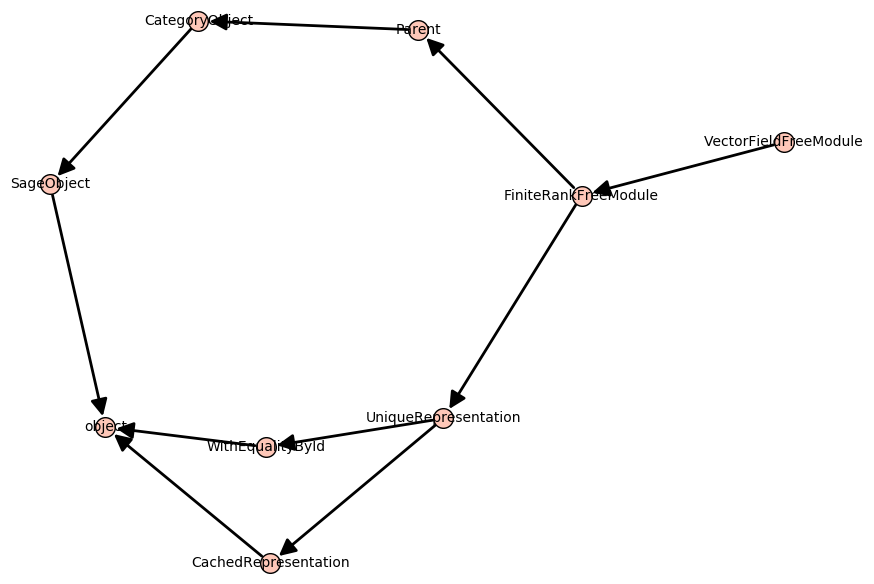

In [37]:
class_graph(
sage.manifolds.differentiable.vectorfield_module.VectorFieldFreeModule
).plot()

Since $U$ is a chart domain, the free module $\mathfrak{X}(U)$ is automatically endowed with a basis: the coordinate frame associated to the chart:

In [38]:
YU.bases()

[Coordinate frame (U, (d/dx,d/dy))]

Let us denote by `eU` this frame. We can set `eU = YU.bases()[0]` or
alternatively

In [39]:
eU = YU.default_basis()
eU

Coordinate frame (U, (d/dx,d/dy))

Another equivalent instruction would have been `eU = U.default_frame()`.

Similarly, $\mathfrak{X}(V)$ is a free module, endowed with the coordinate frame
associated to stereographic coordinates from the South pole, which we
denote by `eV`:

In [40]:
YV = V.vector_field_module()
YV.bases()

[Coordinate frame (V, (d/dxp,d/dyp))]

In [41]:
eV = YV.default_basis()
eV

Coordinate frame (V, (d/dxp,d/dyp))

If we consider the intersection $W=U\cap V$, we notice its module
of vector fields is endowed with two bases, reflecting the fact that
$W$ is covered by two charts: $(W,(x,y))$ and $(W,(x',y'))$:

In [42]:
W = U.intersection(V)
YW = W.vector_field_module()
YW.bases()

[Coordinate frame (W, (d/dx,d/dy)), Coordinate frame (W, (d/dxp,d/dyp))]

Let us denote by `eUW` and `eUV` these two bases, which are
actually the restrictions of the vector frames `eU` and `eV` to $W$:

In [43]:
eUW = eU.restrict(W)
eVW = eV.restrict(W)
YW.bases() == [eUW, eVW]

True

The free module $\mathfrak{X}(W)$ is also automatically endowed with automorphisms
connecting the two bases, i.e. change-of-frame operators:

In [44]:
W.changes_of_frame()

{(Coordinate frame (W, (d/dx,d/dy)),
  Coordinate frame (W, (d/dxp,d/dyp))): Field of tangent-space automorphisms on the Open subset W of the 2-dimensional differentiable manifold M,
 (Coordinate frame (W, (d/dxp,d/dyp)),
  Coordinate frame (W, (d/dx,d/dy))): Field of tangent-space automorphisms on the Open subset W of the 2-dimensional differentiable manifold M}

The first of them is

In [45]:
P = W.change_of_frame(eUW, eVW)
P

Field of tangent-space automorphisms on the Open subset W of the 2-dimensional differentiable manifold M

It belongs to the general linear group of the free module $\mathfrak{X}(W)$:

In [46]:
P.parent()

General linear group of the Free module X(W) of vector fields on the Open subset W of the 2-dimensional differentiable manifold M

and its matrix is deduced from the Jacobian matrix of the transition map `XV` $\to$ `XU`:

In [47]:
P[:]

[-x^2 + y^2     -2*x*y]
[    -2*x*y  x^2 - y^2]

## An example of vector field

We introduce a vector field $v$ on $M$ by

In [48]:
v = M.vector_field(name='v')
v[eU, 0] = f.restrict(U)
v[eU, 1] = -2
v.display(eU)

v = 1/(x^2 + y^2 + 1) d/dx - 2 d/dy

Notice that at this stage, we have defined $v$ only on $U$, by setting
its components in the vector frame `eU`, either explicitely as scalar
fields, like the component $v^0$ set to the restriction of $f$ to $U$ or
to some symbolic expression, like for the component $v^1$: the $-2$
will be coerced to the constant scalar field of value $-2$.
We can ask for the scalar-field value of a components via the double-bracket
operator, since `eU` is the default frame on $M$, we don't have to specify
it:

In [49]:
v[[0]]

Scalar field f on the Open subset U of the 2-dimensional differentiable manifold M

In [50]:
v[[0]].display()

f: U --> R
   (x, y) |--> 1/(x^2 + y^2 + 1)
on W: (xp, yp) |--> (xp^2 + yp^2)/(xp^2 + yp^2 + 1)

Note that the single bracket operator returns a chart function
of the component:

In [51]:
v[0]

1/(x^2 + y^2 + 1)

The restriction of $v$ to $W$ is of course

In [52]:
v.restrict(W).display(eUW)

v = 1/(x^2 + y^2 + 1) d/dx - 2 d/dy

Since we have a second vector frame on $W$, namely `eVW`, and the
change-of-frame automorphisms are known, we can ask for the components
of $v$ with respect to that frame:

In [53]:
v.restrict(W).display(eVW)

v = (4*x*y^3 - x^2 + 4*(x^3 + x)*y + y^2)/(x^6 + y^6 + (3*x^2 + 1)*y^4 + x^4 + (3*x^4 + 2*x^2)*y^2) d/dxp - 2*(x^4 - y^4 + x^2 + x*y - y^2)/(x^6 + y^6 + (3*x^2 + 1)*y^4 + x^4 + (3*x^4 + 2*x^2)*y^2) d/dyp

Notice that the components are expressed in terms of the coordinates $(x,y)$
since they form the default chart on $W$. To have them expressed in
terms of the coordinates $(x',y')$, we have to add the restriction of
the chart
$(V,(x',y'))$ to $W$ as the second argument of the method `display()`:

In [54]:
v.restrict(W).display(eVW, XV.restrict(W))

v = -(xp^4 - 4*xp*yp^3 - yp^4 - 4*(xp^3 + xp)*yp)/(xp^2 + yp^2 + 1) d/dxp - 2*(xp^4 + xp^3*yp + xp*yp^3 - yp^4 + xp^2 - yp^2)/(xp^2 + yp^2 + 1) d/dyp

We extend the expression of $v$ to the full vector frame `XV`
by continuation of this expression:

In [55]:
v.add_comp_by_continuation(eV, W, chart=XV)

We have then

In [56]:
v.display(eV)

v = -(xp^4 - 4*xp*yp^3 - yp^4 - 4*(xp^3 + xp)*yp)/(xp^2 + yp^2 + 1) d/dxp - 2*(xp^4 + xp^3*yp + xp*yp^3 - yp^4 + xp^2 - yp^2)/(xp^2 + yp^2 + 1) d/dyp

At this stage, the vector field $v$ is defined in all $M$.
According to the hairy ball theorem\index{hairy ball theorem}, it has to vanish somewhere.
Let us show that this occurs at the North pole, by first introducing the
latter, as the point of stereographic coordinates $(x',y')=(0,0)$:

In [57]:
N = M((0,0), chart=XV, name='N')
print(N)

Point N on the 2-dimensional differentiable manifold M


As a check, we verify that the image of $N$ by the canonical embedding
$\Phi: \mathbb{S}^2 \to \mathbb{R}^3$ is the point of Cartesian coordinates $(0,0,1)$:

In [58]:
XR3(Phi(N))

(0, 0, 1)

The vanishing of $\left. v\right| _N$:

In [59]:
v.at(N).display()

v = 0

On the other hand, $v$ does not vanish at the point $p$ introduced above:

In [60]:
v.at(p).display()

v = 1/6 d/dx - 2 d/dy

We may plot the vector field $v$ in terms of the stereographic coordinates
from the North pole:

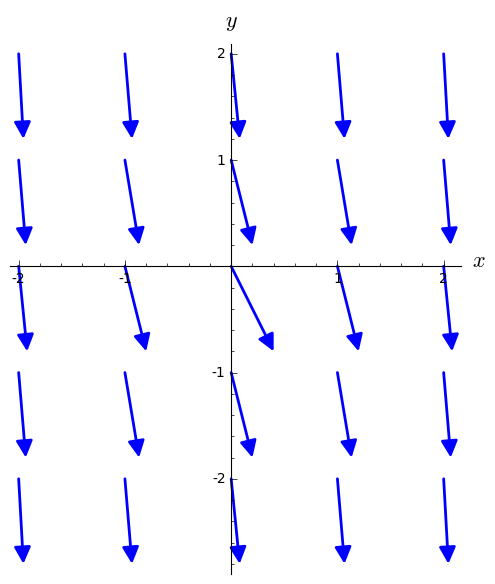

In [61]:
v.plot(chart=XU, chart_domain=XU, max_range=2, 
       number_values=5, scale=0.4, aspect_ratio=1)

or in term of those from the South pole:

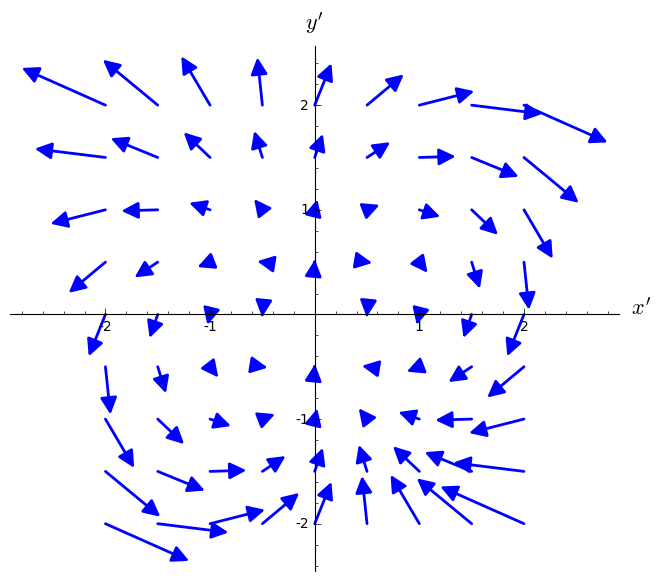

In [62]:
v.plot(chart=XV, chart_domain=XV, max_range=2, 
       number_values=9, scale=0.05, aspect_ratio=1)

Thanks to the embedding $\Phi$, we may also have a 3D plot of $v$
atop of the 3D plot already obtained:

In [63]:
graph_v = v.plot(chart=XR3, mapping=Phi, chart_domain=XU, 
                 number_values=7, scale=0.2) + \
          v.plot(chart=XR3, mapping=Phi, chart_domain=XV, 
                 number_values=7, scale=0.2)
show(graph + graph_v, viewer='threejs', online=True)

Graphics3d Object

Note that the sampling, performed on the two charts `XU` and `XV`
is not uniform on the sphere. A better sampling would be acheived by introducing
spherical coordinates.

### Some details about the implementation of vector fields

Vector fields on $M$ are implemented via the class `VectorField`:

In [64]:
isinstance(v, sage.manifolds.differentiable.vectorfield.VectorField)

True

Since $M$ is not parallelizable, the representation of the vector field
$v$ via its restrictions to parallelizable open subsets; they are stored in the dictionary `_restrictions`, whose keys are the open subsets:

In [65]:
v._restrictions

{Open subset W of the 2-dimensional differentiable manifold M: Vector field v on the Open subset W of the 2-dimensional differentiable manifold M,
 Open subset V of the 2-dimensional differentiable manifold M: Vector field v on the Open subset V of the 2-dimensional differentiable manifold M,
 Open subset U of the 2-dimensional differentiable manifold M: Vector field v on the Open subset U of the 2-dimensional differentiable manifold M}

Let us consider one of these restrictions, for instance the restriction to $U$:

In [66]:
vU = v._restrictions[U]
vU is v.restrict(U)

True

Since $U$ is a parallelizable open subset, `vU` belongs to the class
`VectorFieldParal`:

In [67]:
isinstance(vU, sage.manifolds.differentiable.vectorfield.VectorFieldParal)

True

The main attribute of `vU` is the dictionary `_components`, which stores the components of `vU` with respect to (possibly various) vector frames on $U$, the keys of that dictionary being the vector frames:

In [68]:
vU._components

{Coordinate frame (U, (d/dx,d/dy)): 1-index components w.r.t. Coordinate frame (U, (d/dx,d/dy))}

In [69]:
v._restrictions[W]._components

{Coordinate frame (W, (d/dx,d/dy)): 1-index components w.r.t. Coordinate frame (W, (d/dx,d/dy)),
 Coordinate frame (W, (d/dxp,d/dyp)): 1-index components w.r.t. Coordinate frame (W, (d/dxp,d/dyp))}

The values of the dictionary `_components` belong to the same class [Components](http://doc.sagemath.org/html/en/reference/tensor_free_modules/sage/tensor/modules/comp.html) as that used for the storage of components of tangent vectors (cf. the example of `vp` above):

In [70]:
vUc = vU._components[eU]
vUc

1-index components w.r.t. Coordinate frame (U, (d/dx,d/dy))

In [71]:
type(vUc)

<class 'sage.tensor.modules.comp.Components'>

As already mentioned above, the components themselves are stored in a dictionary, `_comp`, whose keys are the indices:

In [72]:
vUc._comp

{(0,): Scalar field f on the Open subset U of the 2-dimensional differentiable manifold M,
 (1,): Scalar field on the Open subset U of the 2-dimensional differentiable manifold M}

The difference with the tangent vector case is that the values are now scalar fields, i.e. elements of $C^\infty(U)$ in the present case. This is of course in agreement with the treatment of $\mathfrak{X}(U)$ as a free module over $C^\infty(U)$.

Let us perform some algebraic operation on $v$:

In [73]:
w = v + f*v
w

Vector field on the 2-dimensional differentiable manifold M

The code for the addition is accessible via

In [74]:
v.__add__??

As for the addition of scalar field (cf. [this notebook](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_scalar.ipynb)), we see that `__add__()` is implemented at the level
of the generic class `Element` from which `VectorField` inherits.
When both operands of the addition have the same parent, as here, `__add__()` invokes the
method `_add_()`
(note the single underscore on each side of `add`). This operator is
implemented at the level of `TensorField`, as it can be checked from the source code:

In [75]:
v._add_??

The first step in the addition of two vector fields is to search in the
restrictions of both vector fields for common domains: this is performed via the method `_common_subdomains`. Then the addition is performed at the level of the restrictions. The rest of the code is simply the set up of the vector field object containing the result.
Recursively, the addition performed will reach a level at which
the domains are parallelizable. Then a different method `_add_()`, will
be involved, as we can check on `vU`:

In [76]:
vU._add_??

We see that this method `_add_()` is implemented
at the level of tensors on free modules, i.e. in the class
[FreeModuleTensor](http://doc.sagemath.org/html/en/reference/tensor_free_modules/sage/tensor/modules/free_module_tensor.html), from which `VectorFieldParal` inherits. Here the free module is clearly $\mathfrak{X}(U)$. The addition amounts to adding the components in a
a basis of the free module in which both operands have known components. Such
a basis is returned by the method `common_basis` invoked in the first line.
If necessary, this method can use change-of-basis formulas to compute the
components of `self` or `other` in a common basis.
The addition of the components in the returned basis involves the method `__add__()` of 
class `Components`; we can examine the corresponding code via the `Components` object `vUc`:

In [77]:
vUc.__add__??

We note that the computation can be parallelized on the
components if the user has turned on parallelization (this is done with the command
`Parallelism().set(nproc=8)` (for 8 threads)). Focusing on the sequential code, we see that the addition is
performed component by component. Each component being an element of
$C^\infty(U)$ (the base ring of $\mathfrak{X}(U)$), this addition is that
of scalar fields, as presented in [this notebook](http://nbviewer.jupyter.org/github/sagemanifolds/SageManifolds/blob/master/Worksheets/JNCF2018/jncf18_scalar.ipynb).


### Action of a vector field on a scalar field

In [78]:
vf = v(f)
vf

Scalar field v(f) on the 2-dimensional differentiable manifold M

In [79]:
vf.display()

v(f): M --> R
on U: (x, y) |--> 2*(2*y^3 + 2*(x^2 + 1)*y - x)/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1)
on V: (xp, yp) |--> -2*(xp^5 + 2*xp^3*yp^2 + xp*yp^4 - 2*yp^5 - 2*(2*xp^2 + 1)*yp^3 - 2*(xp^4 + xp^2)*yp)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1)

# Tensor fields

### 1-forms

Let us start with a 1-form, namely the differential of $f$:

In [80]:
df = f.differential()
df

1-form df on the 2-dimensional differentiable manifold M

In [81]:
print(df)

1-form df on the 2-dimensional differentiable manifold M


A 1-form is a tensor field of type $(0,1)$:

In [82]:
df.tensor_type()

(0, 1)

while a vector field is a tensor field of type $(1,0)$:

In [83]:
v.tensor_type()

(1, 0)

Specific 1-forms are those forming the dual basis (coframe) of a given vector frame: for instance for the vector frame `eU` = $(U, (\partial_{x}, \partial_{y}))$, we have

In [84]:
eU.dual_basis()

Coordinate coframe (U, (dx,dy))

In [85]:
print(eU.dual_basis()[0])

1-form dx on the Open subset U of the 2-dimensional differentiable manifold M


Since `eU` is the default frame on $M$, the default display of $\mathrm{d}f$ is performed in terms of `eU`'s coframe:

In [86]:
df.display()

df = -2*x/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx - 2*y/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy

In [87]:
df[0] == diff(f.expr(), x)

True

In [88]:
df[1] == diff(f.expr(), y)

True

In [89]:
df.display(eV)

df = 2*xp/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dxp + 2*yp/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dyp

In [90]:
df[eV,0,XV]

2*xp/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1)

In [91]:
df[eV,0,XV] == diff(f.expr(XV), xp)

True

In [92]:
df[eV,1,XV] == diff(f.expr(XV), yp)

True

The parent of $\mathrm{d}f$ is the set $\Omega^1(M)$ of all 1-forms on $M$, considered as a $C^\infty(M)$-module:

In [93]:
print(df.parent())
df.parent()

Module Omega^1(M) of 1-forms on the 2-dimensional differentiable manifold M


Module Omega^1(M) of 1-forms on the 2-dimensional differentiable manifold M

In [94]:
df.parent().base_ring()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold M

This module is actually the dual of `YM` = $\mathfrak{X}(M)$:

In [95]:
YM.dual()

Module Omega^1(M) of 1-forms on the 2-dimensional differentiable manifold M

A 1-form acts on vector fields, yielding a scalar field:

In [96]:
print(df(v))

Scalar field df(v) on the 2-dimensional differentiable manifold M


This scalar field is nothing but the result of the action of $v$ on $f$,
considering $v$ at each point $p\in M$ as a derivation (the very definition of a tangent vector):

In [97]:
df(v) == v(f)

True

### More general tensor fields

We construct a tensor of type $(1,1)$ by taking the tensor product $v\otimes \mathrm{d}f$:

In [98]:
t = v * df
t

Tensor field of type (1,1) on the 2-dimensional differentiable manifold M

In [99]:
t.display()

v*df = -2*x/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) d/dx*dx - 2*y/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) d/dx*dy + 4*x/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dx + 4*y/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dy

In [100]:
t.display(eV)

v*df = -2*(xp^5 - 4*xp^2*yp^3 - xp*yp^4 - 4*(xp^4 + xp^2)*yp)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dxp*dxp - 2*(xp^4*yp - 4*xp*yp^4 - yp^5 - 4*(xp^3 + xp)*yp^2)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dxp*dyp - 4*(xp^5 + xp^4*yp + xp^2*yp^3 - xp*yp^4 + xp^3 - xp*yp^2)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dyp*dxp - 4*(xp^3*yp^2 + xp*yp^4 - yp^5 - yp^3 + (xp^4 + xp^2)*yp)/(xp^6 + yp^6 + 3*(xp^2 + 1)*yp^4 + 3*xp^4 + 3*(xp^4 + 2*xp^2 + 1)*yp^2 + 3*xp^2 + 1) d/dyp*dyp

In [101]:
t.display_comp()

v*df^x_x = -2*x/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) 
v*df^x_y = -2*y/(x^6 + y^6 + 3*(x^2 + 1)*y^4 + 3*x^4 + 3*(x^4 + 2*x^2 + 1)*y^2 + 3*x^2 + 1) 
v*df^y_x = 4*x/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
v*df^y_y = 4*y/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)

The parent of `t` is the set $\mathcal{T}^{(1,1)}(M)$ of all type-$(1,1)$ tensor fields on $M$,
considered as a $C^\infty(M)$-module:

In [102]:
print(t.parent())
t.parent()

Module T^(1,1)(M) of type-(1,1) tensors fields on the 2-dimensional differentiable manifold M


Module T^(1,1)(M) of type-(1,1) tensors fields on the 2-dimensional differentiable manifold M

In [103]:
t.parent().base_ring()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold M

In [104]:
t._restrictions

{Open subset V of the 2-dimensional differentiable manifold M: Tensor field v*df of type (1,1) on the Open subset V of the 2-dimensional differentiable manifold M,
 Open subset U of the 2-dimensional differentiable manifold M: Tensor field v*df of type (1,1) on the Open subset U of the 2-dimensional differentiable manifold M}

As for vector fields, since $M$ is not parallelizable, the $C^\infty(M)$-module
$\mathcal{T}^{(1,1)}(M)$ is not free and the tensor fields are described by their restrictions to parallelizable subdomains:

In [105]:
print(t._restrictions[U].parent())

Free module T^(1,1)(U) of type-(1,1) tensors fields on the Open subset U of the 2-dimensional differentiable manifold M


In [106]:
t._restrictions[U].parent().base_ring()

Algebra of differentiable scalar fields on the Open subset U of the 2-dimensional differentiable manifold M

### Riemannian metric on $M$

The standard metric on $M=\mathbb{S}^2$ is that induced by the Euclidean metric of $\mathbb{R}^3$. Let us start by defining the latter:

In [107]:
h = R3.metric('h')
h[0,0], h[1,1], h[2, 2] = 1, 1, 1
h.display()

h = dX*dX + dY*dY + dZ*dZ

The metric $g$ on $M$ is the pullback of $h$ associated with the embedding $\Phi$:

In [108]:
g = M.metric('g')
g.set( Phi.pullback(h) )
print(g)

Riemannian metric g on the 2-dimensional differentiable manifold M


Note that we could have defined $g$ intrinsically, i.e. by providing its components in the two frames `eU` and `eV`, as we did for the metric $h$ on $\mathbb{R}^3$. Instead, we have chosen to get it as the pullback of $h$, as an example of pullback associated with some differential map. 

The metric is a symmetric tensor field of type (0,2):

In [109]:
g.tensor_type()

(0, 2)

The expression of the metric in terms of the default frame on $M$ (`eU`):

In [110]:
g.display()

g = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx*dx + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy*dy

We may factorize the metric components:

In [111]:
g[0,0].factor() ; g[1,1].factor()

4/(x^2 + y^2 + 1)^2

In [112]:
g.display()

g = 4/(x^2 + y^2 + 1)^2 dx*dx + 4/(x^2 + y^2 + 1)^2 dy*dy

A matrix view of the components of $g$ in the manifold's default frame:

In [113]:
g[:]

[4/(x^2 + y^2 + 1)^2                   0]
[                  0 4/(x^2 + y^2 + 1)^2]

Display in terms of the vector frame $(V, (\partial_{x'}, \partial_{y'}))$:

In [114]:
g.display(eV)

g = 4/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dxp*dxp + 4/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dyp*dyp

The metric acts on vector field pairs, resulting in a scalar field:

In [115]:
print(g(v,v))

Scalar field g(v,v) on the 2-dimensional differentiable manifold M


In [116]:
g(v,v).parent()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold M

In [117]:
g(v,v).display()

g(v,v): M --> R
on U: (x, y) |--> 4*(4*x^4 + 4*y^4 + 8*(x^2 + 1)*y^2 + 8*x^2 + 5)/(x^8 + y^8 + 4*(x^2 + 1)*y^6 + 4*x^6 + 6*(x^4 + 2*x^2 + 1)*y^4 + 6*x^4 + 4*(x^6 + 3*x^4 + 3*x^2 + 1)*y^2 + 4*x^2 + 1)
on V: (xp, yp) |--> 4*(5*xp^8 + 5*yp^8 + 4*(5*xp^2 + 2)*yp^6 + 8*xp^6 + 2*(15*xp^4 + 12*xp^2 + 2)*yp^4 + 4*xp^4 + 4*(5*xp^6 + 6*xp^4 + 2*xp^2)*yp^2)/(xp^8 + yp^8 + 4*(xp^2 + 1)*yp^6 + 4*xp^6 + 6*(xp^4 + 2*xp^2 + 1)*yp^4 + 6*xp^4 + 4*(xp^6 + 3*xp^4 + 3*xp^2 + 1)*yp^2 + 4*xp^2 + 1)

The **Levi-Civita connection** associated with the metric $g$:

In [118]:
nab = g.connection()
print(nab)
nab

Levi-Civita connection nabla_g associated with the Riemannian metric g on the 2-dimensional differentiable manifold M


Levi-Civita connection nabla_g associated with the Riemannian metric g on the 2-dimensional differentiable manifold M

The nonzero Christoffel symbols of $g$ (skipping those that can be deduced by symmetry on the last two indices) w.r.t. the chart `XU`:

In [119]:
g.christoffel_symbols_display(chart=XU)

Gam^x_xx = -2*x/(x^2 + y^2 + 1) 
Gam^x_xy = -2*y/(x^2 + y^2 + 1) 
Gam^x_yy = 2*x/(x^2 + y^2 + 1) 
Gam^y_xx = 2*y/(x^2 + y^2 + 1) 
Gam^y_xy = -2*x/(x^2 + y^2 + 1) 
Gam^y_yy = -2*y/(x^2 + y^2 + 1)

$\nabla_g$ acting on the vector field $v$:

In [120]:
Dv = nab(v)
print(Dv)

Tensor field nabla_g(v) of type (1,1) on the 2-dimensional differentiable manifold M


In [121]:
Dv.display()

nabla_g(v) = 4*(y^3 + (x^2 + 1)*y - x)/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dx*dx - 4*(x^3 + x*y^2 + x + y)/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dx*dy + 2*(2*x^3 + 2*x*y^2 + 2*x + y)/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dx + 2*(2*y^3 + 2*(x^2 + 1)*y - x)/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dy

### Curvature

The Riemann tensor associated with the metric $g$:

In [122]:
Riem = g.riemann()
print(Riem)
Riem.display()

Tensor field Riem(g) of type (1,3) on the 2-dimensional differentiable manifold M


Riem(g) = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dx*dy*dx*dy - 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dx*dy*dy*dx - 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dx*dx*dy + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dx*dy*dx

The components of the Riemann tensor in the default frame on $M$:

In [123]:
Riem.display_comp()

Riem(g)^x_yxy = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^x_yyx = -4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^y_xxy = -4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^y_xyx = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)

In [124]:
print(Riem.parent())

Module T^(1,3)(M) of type-(1,3) tensors fields on the 2-dimensional differentiable manifold M


In [125]:
Riem.symmetries()

no symmetry; antisymmetry: (2, 3)


The Riemann tensor associated with the Euclidean metric $h$ on $\mathbb{R}^3$ is identically zero:

In [126]:
h.riemann().display()

Riem(h) = 0

The Ricci tensor and the Ricci scalar:

In [127]:
Ric = g.ricci()
Ric.display()

Ric(g) = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx*dx + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy*dy

In [128]:
R = g.ricci_scalar()
R.display()

r(g): M --> R
on U: (x, y) |--> 2
on V: (xp, yp) |--> 2

Hence we recover the fact that $(\mathbb{S}^2,g)$ is a Riemannian manifold of constant positive curvature.

In dimension 2, the Riemann curvature tensor is entirely determined by the Ricci scalar $R$ according to
$$ R^i_{\ \, jlk} = \frac{R}{2} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right)$$
Let us check this formula here, under the form $R^i_{\ \, jlk} = -R g_{j[k} \delta^i_{\ \, l]}$:

In [129]:
delta = M.tangent_identity_field()
Riem == - R*(g*delta).antisymmetrize(2,3)

True

Similarly the relation $\mathrm{Ric} = (R/2)\; g$ must hold:

In [130]:
Ric == (R/2)*g

True

The **Levi-Civita tensor** associated with $g$:

In [131]:
eps = g.volume_form()
print(eps)
eps.display()

2-form eps_g on the 2-dimensional differentiable manifold M


eps_g = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx/\dy

The exterior derivative of the 2-form $\epsilon_g$:

In [132]:
print(eps.exterior_derivative())

3-form deps_g on the 2-dimensional differentiable manifold M


Of course, since $M$ has dimension 2, all 3-forms vanish identically:

In [133]:
eps.exterior_derivative().display()

deps_g = 0